### Predicting the no of likes of Videos - EDA

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df.head()

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",351430.0,298.0,900.0,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,2351.0
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",461508.0,74.0,314.0,Vice Ganda notices Bela Padilla's sudden chang...,CA,3264.0
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",40205.0,150.0,100.0,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,580.0
3,22618,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10.0,2018-02-21,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509726.0,847.0,4536.0,Hi hi hi! here's our vid on FLASHBACK's channe...,GB,82773.0
4,74074,MUMMY NE NI KEHTA - 2 FT. 102 NOT OUT| DUDE S...,Dude Seriously,23.0,2018-05-10,"dude|""seriously""|""friends""|""fun""|""gujarati""|""h...",74311.0,69.0,161.0,BOOK YOUR TICKETS HERE: https://goo.gl/QxdSyg...,IN,3557.0


In [42]:
df_test.head(3)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code
0,87185,జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...,CHIRRAVURI FOUNDATION,22.0,2018-01-17,"Chirravuri|""Foundation""|""chirravuri foundation...",80793.0,54.0,79.0,8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...,IN
1,9431,ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...,VIRAL IN INDIA,22.0,2017-11-18,"Raj Thackeray|""LIVE SPEECH""|""latest Speech""|""r...",150317.0,230.0,311.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,IN
2,40599,"Thank you, Rider Nation!",Saskatchewan Roughriders,17.0,2017-12-01,"Roughriders|""Riders""|""CFL""|""Regina""|""Saskatche...",6558.0,10.0,7.0,"“To the devoted, the impassioned, the loyal:\n...",CA


In [43]:
all_cols=df.columns
target='likes'
print(all_cols)

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')


In [44]:
print(df.shape)
print(df_test.shape)

(26061, 12)
(11170, 11)


In [45]:
df.dtypes

video_id           int64
title             object
channel_title     object
category_id      float64
publish_date      object
tags              object
views            float64
dislikes         float64
comment_count    float64
description       object
country_code      object
likes            float64
dtype: object

In [46]:
ids='video_id'
df.describe()

,video_id,category_id,views,dislikes,comment_count,likes
count,26061.000000,26061.000000,2.606100e+04,26061.000000,26061.000000,2.606100e+04
mean,44560.500518,21.498292,3.875939e+05,539.231380,1693.145620,1.258067e+04
std,25688.103401,6.304901,1.595818e+06,3117.168779,9247.594359,5.856355e+04
min,2.000000,1.000000,7.870000e+02,0.000000,0.000000,0.000000e+00
25%,22523.000000,22.000000,6.859900e+04,53.000000,93.000000,6.830000e+02
50%,44648.000000,24.000000,1.535950e+05,134.000000,389.000000,2.541000e+03
75%,66744.000000,25.000000,3.380170e+05,348.000000,1211.000000,8.553000e+03
max,89272.000000,43.000000,1.434083e+08,217017.000000,692312.000000,3.880088e+06


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [48]:
num_cols=[col for col in all_cols if (df[col].dtypes!='O') and (col!=ids)]
print(num_cols)

['category_id', 'views', 'dislikes', 'comment_count', 'likes']


<AxesSubplot:>

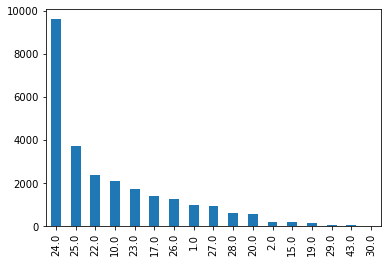

In [49]:
df['category_id'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [50]:
def dist_plot(cols):
    for col in cols:
        sns.distplot(a=df[col],bins=100)
        plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


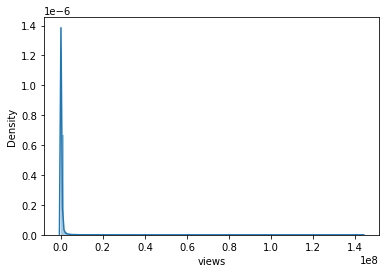

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


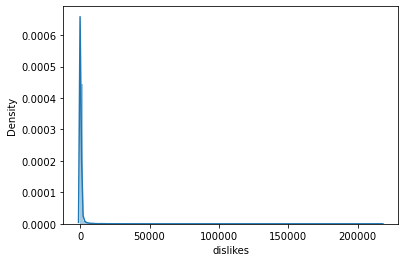

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


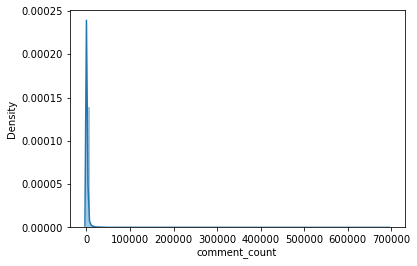

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


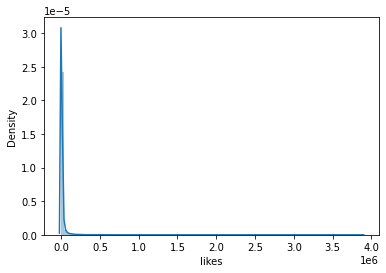

In [51]:
dist_plot(['views', 'dislikes', 'comment_count', 'likes'])

The train data is right skewed and most of the data is present towards the left side and the same can observed in the test data as well.

In [52]:
df['likes']=df['likes'].apply(lambda x:np.log(x+1))

In [53]:
import math
for col in ['views', 'dislikes', 'comment_count']:
    df[col]=df[col].apply(lambda x:np.log(x+1))
    df_test[col]=df_test[col].apply(lambda x:np.log(x+1))
    #tot_df=tot_df[col].apply(lambda x:np.log(x+1))
df.head(3)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",12.769769,5.700444,6.803505,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,7.763021
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",13.042257,4.317488,5.752573,Vice Ganda notices Bela Padilla's sudden chang...,CA,8.091015
2,1856,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n ಕ್...,SANDALWOOD REVIEWS,24.0,2018-03-26,"challenging star darshan latest news|""challeng...",10.601772,5.017280,4.615121,ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ ಕ್ಲ...,IN,6.364751


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


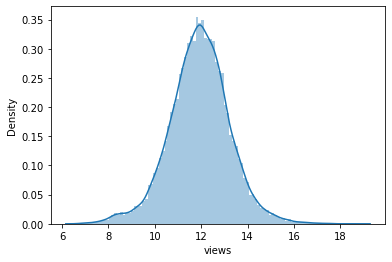

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


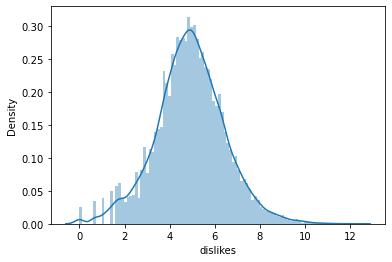

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


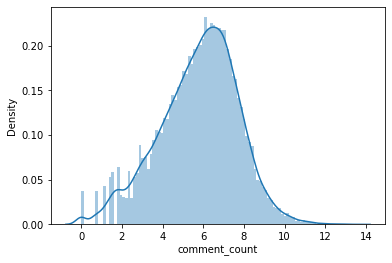

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


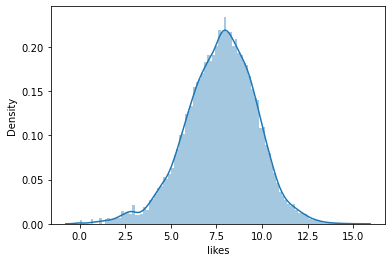

In [54]:
dist_plot(['views', 'dislikes', 'comment_count', 'likes'])

Now the distribution for columns is almost normal and are better features.

In [55]:
cat_cols=[col for col in all_cols if df[col].dtypes=='O']
print(cat_cols)

['title', 'channel_title', 'publish_date', 'tags', 'description', 'country_code']


In [56]:
df['country_code'].value_counts()

IN    10401
CA    10326
US     3095
GB     2239
Name: country_code, dtype: int64

In [57]:
df_test['country_code'].value_counts()

IN    4458
CA    4425
US    1327
GB     960
Name: country_code, dtype: int64

<AxesSubplot:xlabel='country_code', ylabel='count'>

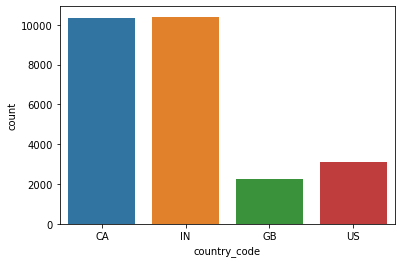

In [61]:
sns.countplot(x='country_code',data=df)

In [63]:
df['publish_date']=pd.to_datetime(df['publish_date'],format='%Y-%m-%d')
df_test['publish_date']=pd.to_datetime(df_test['publish_date'],format='%Y-%m-%d')
df.head(2)

,video_id,title,channel_title,category_id,publish_date,tags,views,dislikes,comment_count,description,country_code,likes
0,53364,Alif Allah Aur Insaan Episode 34 HUM TV Drama ...,HUM TV,24.0,2017-12-12,"HUM|""TV""|""Alif Allah Aur Insaan""|""Episode 34""|...",12.769769,5.700444,6.803505,Alif Allah Aur Insaan Episode 34 Full - 12 Dec...,CA,7.763021
1,51040,It's Showtime Miss Q & A: Bela gets jealous of...,ABS-CBN Entertainment,24.0,2018-03-08,"ABS-CBN Entertainment|""ABS-CBN""|""ABS-CBN Onlin...",13.042257,4.317488,5.752573,Vice Ganda notices Bela Padilla's sudden chang...,CA,8.091015


In [67]:
df['publish_year']=df['publish_date'].dt.year
df_test['publish_year']=df_test['publish_date'].dt.year

<AxesSubplot:xlabel='publish_year', ylabel='count'>

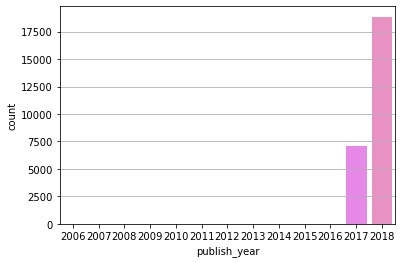

In [75]:
plt.grid('whitespace')
sns.countplot(x='publish_year',data=df)

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='publish_year', ylabel='Density'>

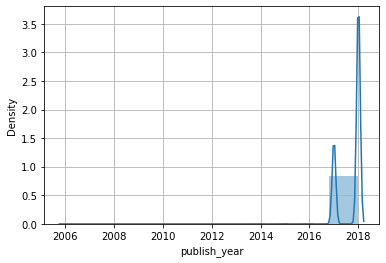

In [76]:
plt.grid('whitespace')
sns.distplot(a=df['publish_year'],bins=10)

In [82]:
df['publish_month']=df['publish_date'].dt.month
df_test['publish_month']=df_test['publish_date'].dt.month

<AxesSubplot:xlabel='publish_month', ylabel='count'>

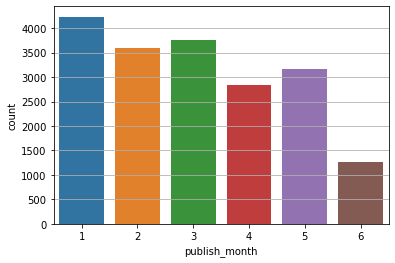

In [86]:
plt.grid('whitespace')
sns.countplot(x='publish_month',data=df[df['publish_year']==2018])

In [91]:
df['publish_day_name']=df['publish_date'].dt.day_name()
df_test['publish_day_name']=df_test['publish_date'].dt.day_name()

<AxesSubplot:xlabel='publish_day_name', ylabel='count'>

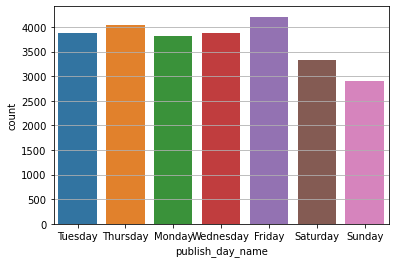

In [93]:
plt.grid('whitespace')
sns.countplot(x='publish_day_name',data=df)

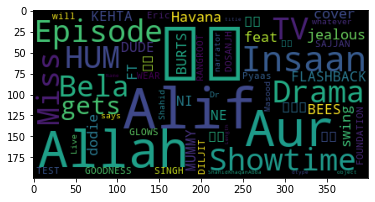

In [97]:
from wordcloud import WordCloud,STOPWORDS
wc=WordCloud(stopwords=set(list(STOPWORDS)+['|']),random_state=42)
text_cols=['title', 'channel_title','description','tags']
img=wc.generate(str(df['title']))
plt.imshow(img)

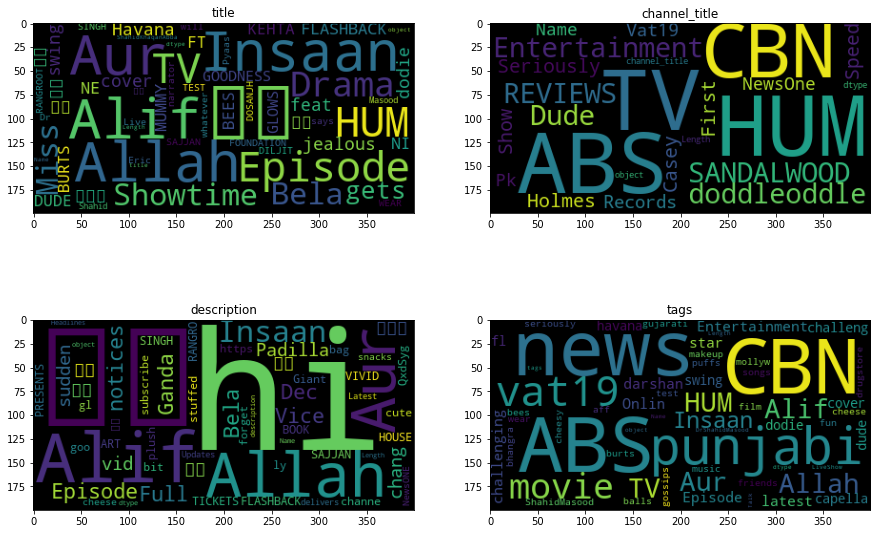

In [103]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes=[row for ax in axes for row in ax]
for i,col in enumerate(text_cols):
    img=wc.generate(str(df[col]))
    _=axes[i].imshow(img)
    _=axes[i].set_title(col)

### BiVariate Analysis

In [104]:
print(num_cols)

['category_id', 'views', 'dislikes', 'comment_count', 'likes']


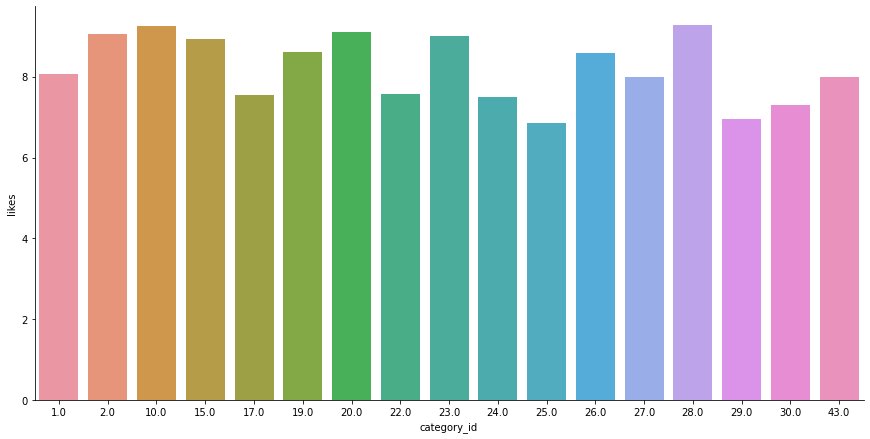

In [112]:
chk=df.groupby('category_id')['likes'].median().sort_values(ascending=False).reset_index()
sns.catplot(x='category_id',y='likes',data=chk,kind='bar',height=6,aspect=16/8)

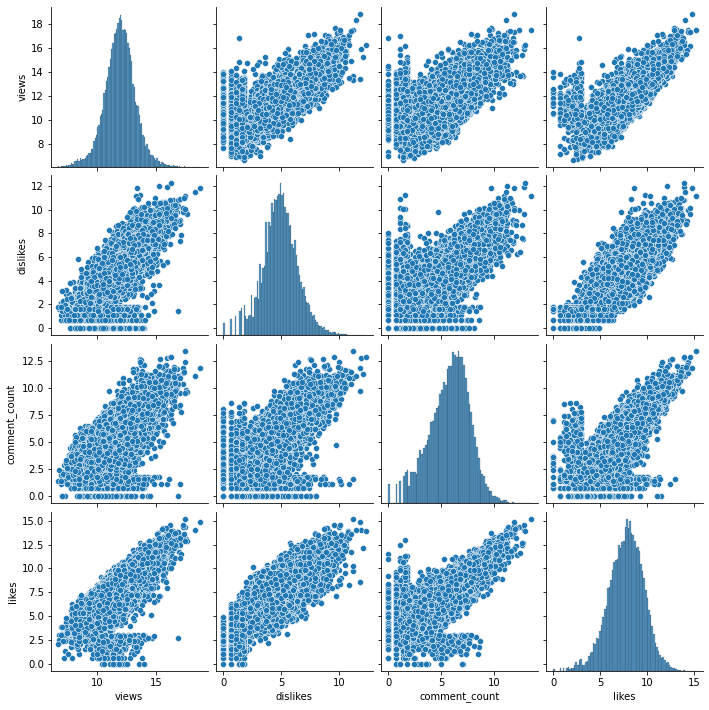

In [114]:
sns.pairplot(df[['views', 'dislikes', 'comment_count', 'likes']])

Views,Dsilikes,Comment_count are positively correlated with the target variable (Likes).

<AxesSubplot:>

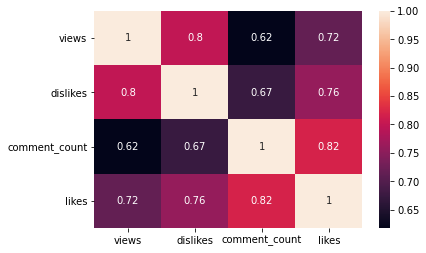

In [116]:
sns.heatmap(df[['views', 'dislikes', 'comment_count', 'likes']].corr(),annot=True)

In [119]:
print([col for col in all_cols if col not in num_cols])

['video_id', 'title', 'channel_title', 'publish_date', 'tags', 'description', 'country_code']


In [126]:
df['title_len']=df['title'].apply(lambda x:len(x))
df_test['title_len']=df_test['title'].apply(lambda x:len(x))

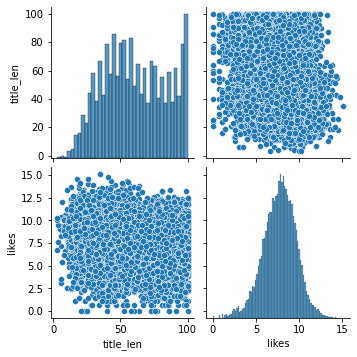

In [132]:
sns.pairplot(df[['title_len','likes']])

Title length & likes have no correlation/ very less negative correlation

In [133]:
df[['title_len','likes']].corr()

,title_len,likes
title_len,1.000000,-0.229339
likes,-0.229339,1.000000


<AxesSubplot:xlabel='channel_title'>

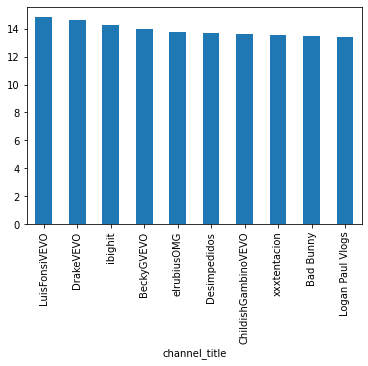

In [150]:
df.groupby('channel_title')['likes'].median().sort_values(ascending=False)[:10].plot(kind='bar')
#sample.columns=['channel_title','likes']
#print(sample_dict)
#sns.barplot(x='channel_title',y='likes',data=sample)
#plt.bar(x=sample_dict.keys(),y=sample_dict.values())

Top channels with most likes.

In [167]:
sample=df.groupby(['country_code','channel_title'])['likes'].median().sort_values(ascending=False).reset_index() #['likes'].median().sort_values(ascending=False)[:10].plot(kind='bar')

In [168]:
sample.columns=['country_code','channel_title','likes']
sample.head()

,country_code,channel_title,likes
0,GB,LuisFonsiVEVO,14.803627
1,GB,DrakeVEVO,14.581986
2,GB,ibighit,14.223587
3,GB,BeckyGVEVO,13.985566
4,GB,elrubiusOMG,13.726927


The top 5 most liked channels are from GB 

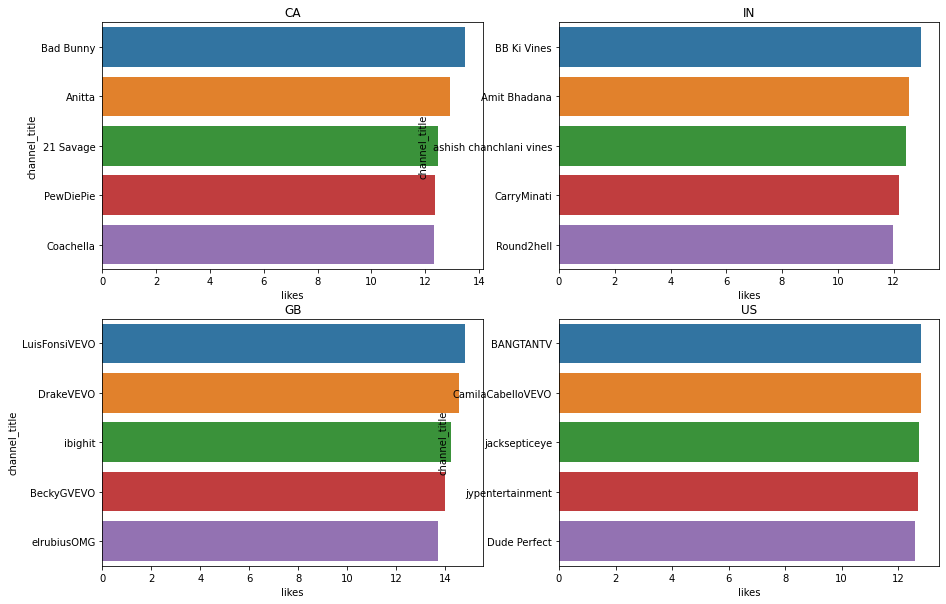

In [184]:
fig,axes=plt.subplots(2,2,figsize=(15,10))
axes=[row for axe in axes for row in axe]
#print(axes[0],axes[1])
for i,country in enumerate(df['country_code'].unique()):
    sample_country=sample[sample['country_code']==country][:5]
    sns.barplot(y='channel_title',x='likes',data=sample_country,orient='h',ax=axes[i]).set_title(country)

The top 5 most liked channels from all countries.

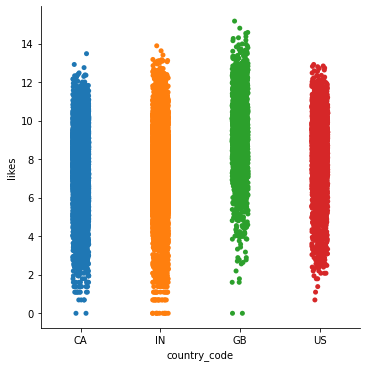

In [188]:
sns.catplot(x='country_code',y='likes',data=df)

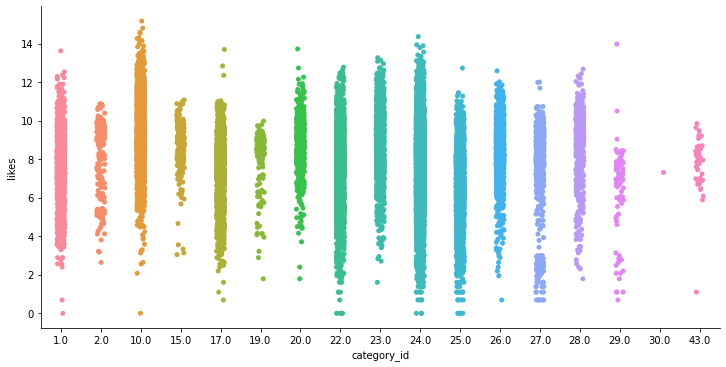

In [191]:
sns.catplot(x='category_id',y='likes',data=df,aspect=16/8)

In [193]:
print(df.columns)

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes', 'publish_year', 'publish_month',
       'publish_day_name', 'title_len'],
      dtype='object')


<AxesSubplot:xlabel='publish_year'>

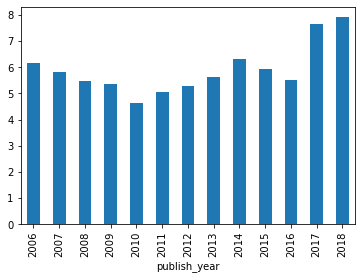

In [196]:
df.groupby('publish_year')['likes'].median().plot(kind='bar')

<AxesSubplot:xlabel='publish_month'>

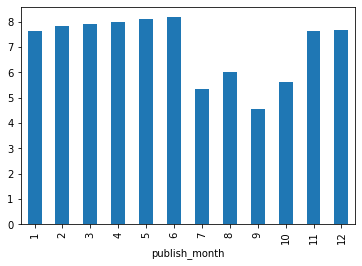

In [197]:
df.groupby('publish_month')['likes'].median().plot(kind='bar')

<AxesSubplot:xlabel='publish_day_name'>

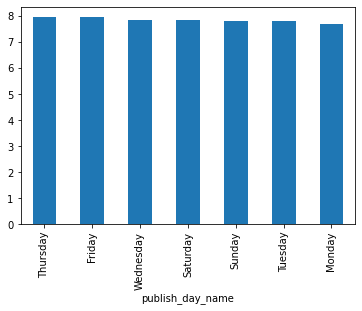

In [199]:
df.groupby('publish_day_name')['likes'].median().sort_values(ascending=False).plot(kind='bar')

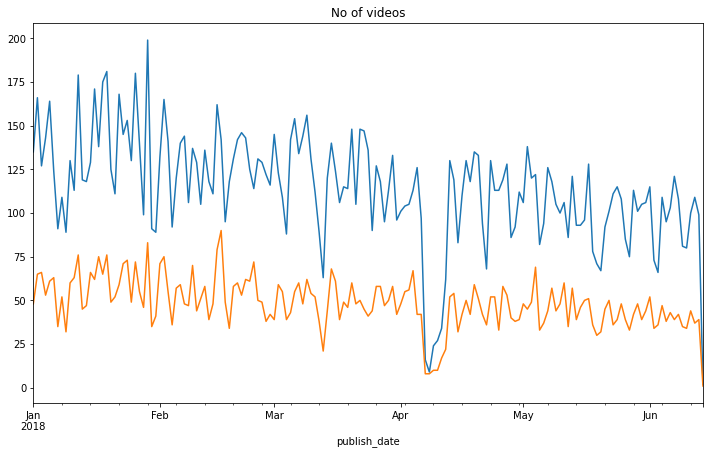

In [203]:
sample=df[df['publish_year']>2017]
sample_test=df_test[df_test['publish_year']>2017]
plt.grid('whitespace')
sample.sort_values(by='publish_date').groupby('publish_date').size().plot(figsize=(12,7),title='No of videos')
sample_test.sort_values(by='publish_date').groupby('publish_date').size().plot(figsize=(12,7),title='No of videos')
plt.show()

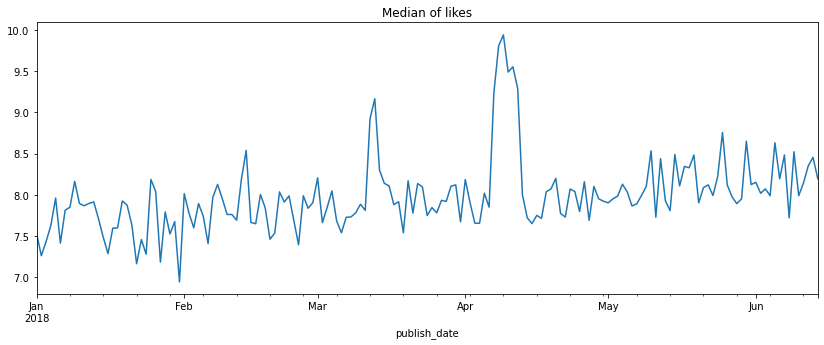

In [209]:
sample=df[df['publish_year']>2017]
plt.grid('whitespace')
sample.sort_values(by='publish_date').groupby('publish_date')['likes'].median().plot(figsize=(14,5),title='Median of likes')
plt.show()

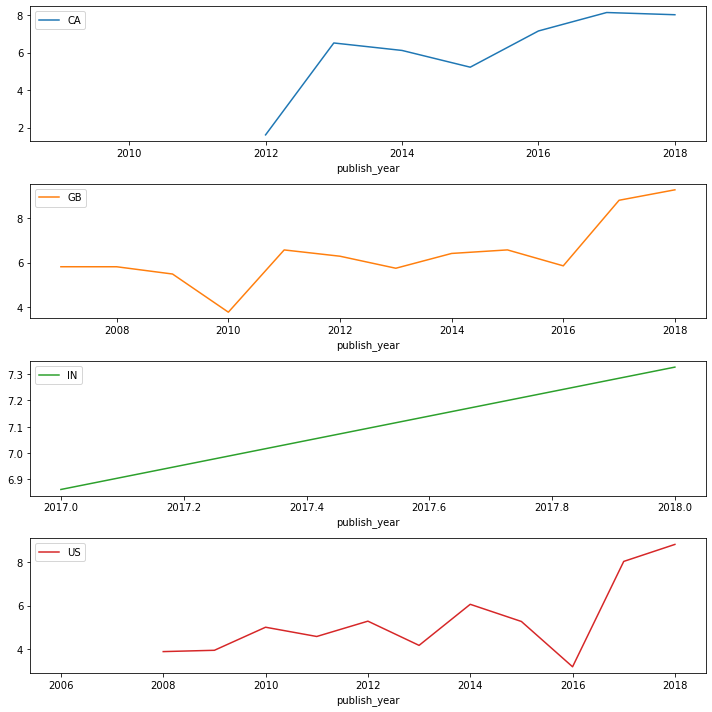

In [222]:
sample=df.groupby(['publish_year','country_code'])['likes'].median().reset_index()
sample.pivot_table(values='likes',index='publish_year',columns='country_code').plot(subplots=True,figsize=(10,10),sharex=False)
plt.tight_layout()